<a href="https://colab.research.google.com/github/shraddhanikam/INeuron-EXam/blob/main/housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


EDA


In [15]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [17]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [18]:
# size of dataset
df.shape

(13320, 9)

In [44]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2532,Built-up Area,Ready To Move,CV Raman Nagar,2 BHK,NaN,1028,2.0,1.0,49.00
4752,Super built-up Area,18-Aug,Hennur Road,2 BHK,DSeldpr,1081,2.0,1.0,30.27
3601,Super built-up Area,18-Jul,Sarjapur,2 BHK,Vehes L,1157,2.0,1.0,40.00
5106,Super built-up Area,Ready To Move,Varthur,3 BHK,Vaensia,1450,3.0,2.0,71.00
10835,Plot Area,Ready To Move,Judicial Layout,4 Bedroom,NaN,1500,3.0,2.0,162.00


In [43]:
df.memory_usage(deep=True)

Index              128
area_type       990186
availability    913451
location        929983
size            835473
society         676416
total_sqft      812590
bath            106560
balcony         106560
price           106560
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [45]:
# chech datatypes
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [46]:
#mathematical representation of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [47]:
#check duplicate value
df.duplicated().sum()

529

In [48]:
#check columns name
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [52]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [22]:
#check null value
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [23]:
missing_values =df.isnull().sum()
missing_values = missing_values[missing_values >0]
missing_values.sort_values(inplace =True)
missing_values

location       1
size          16
bath          73
balcony      609
society     5502
dtype: int64

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum()/13320).sort_values(ascending=False)
missing_data = pd.concat([total,missing_percent], axis=1, keys = ['Total','Percentage'])
missing_data

,Total,Percentage
society,5502,0.413063
balcony,609,0.045721
bath,73,0.005480
size,16,0.001201
location,1,0.000075
area_type,0,0.000000
availability,0,0.000000
total_sqft,0,0.000000
price,0,0.000000


<Axes: >

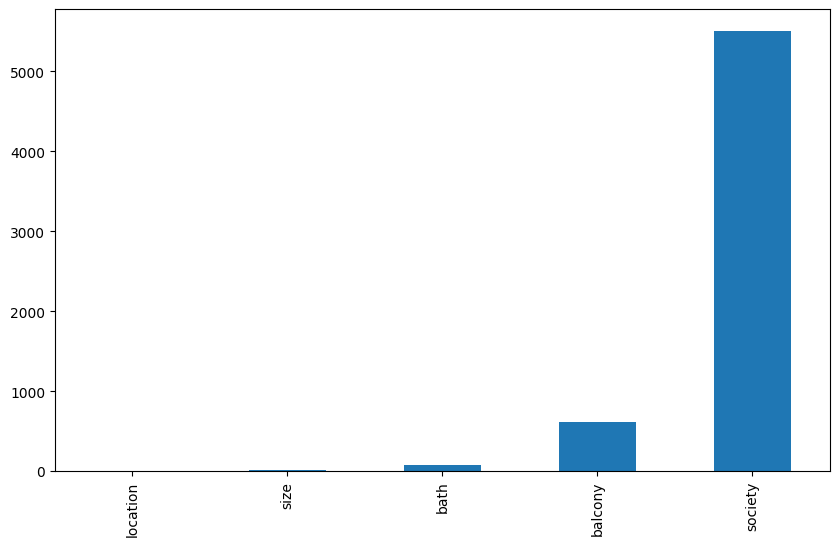

In [26]:
missing_values.plot.bar(figsize =(10,6))



In [27]:
df.corr()['price']


bath       0.456345
balcony    0.120355
price      1.000000
Name: price, dtype: float64

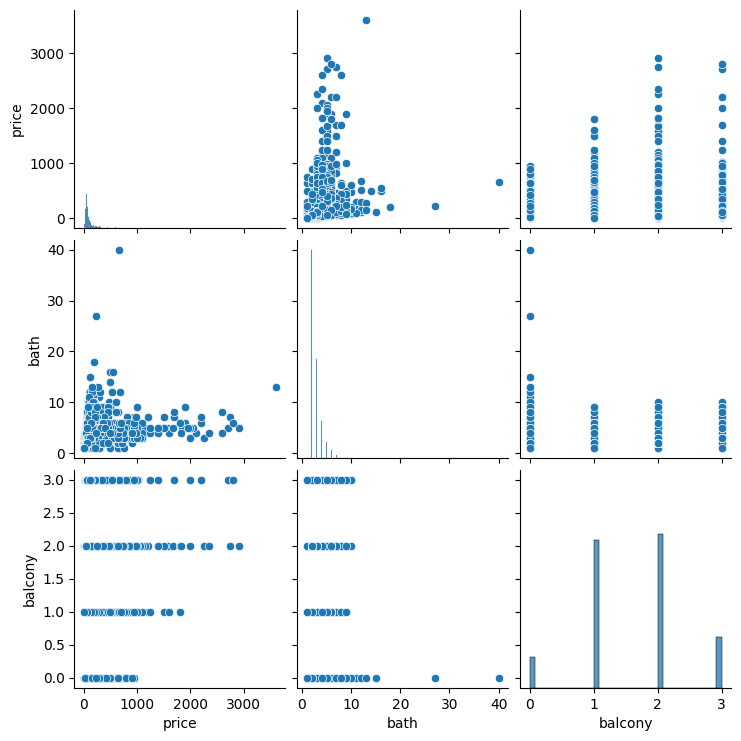

In [28]:


cols = ['price', 'area_type','availability','location','size', 'society',
       'total_sqft', 'bath', 'balcony']
sns.pairplot(df[cols], size = 2.5)
plt.show();



In [49]:
#drop not useful feature which can have null values
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [50]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [51]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [53]:
corr_mat=df.corr()

In [54]:
import seaborn as sns

In [56]:
#find out categorical
cat_feature=[column for column in df.columns if df[column].dtype=="O"]
#numeric feature
num_feature=[column for column in df.columns if df[column].dtype!="O"]

In [59]:
df[cat_feature] #categorical feature

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200
...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689


In [60]:
df[num_feature]  #numeric feature

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [61]:
#numeric_features = df.select_dtypes(include= [np.number])
#numeric_features

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [63]:
#discrete_feature = df.select_dtypes=="O"
#discrete_feature
#cat_feature=[column for column in df.columns if df[column].dtype=="O"]

False

In [64]:


#for feature in numeric_features :
 # print(feature)



bath
balcony
price


<Axes: xlabel='count', ylabel='total_sqft'>

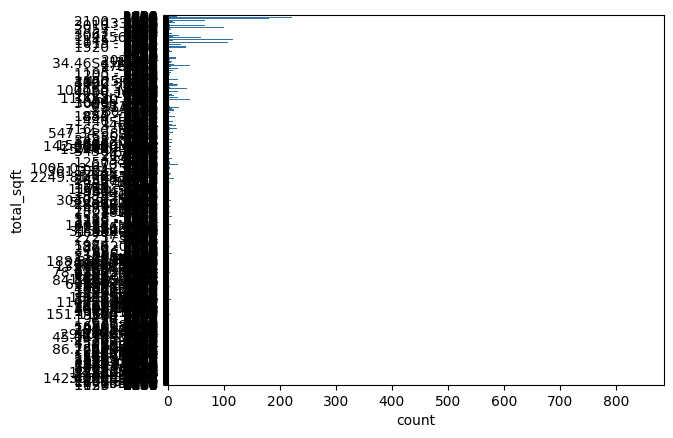

In [65]:
#plots of categorical feature
sns.countplot(df["total_sqft"])

<Axes: xlabel='count', ylabel='society'>

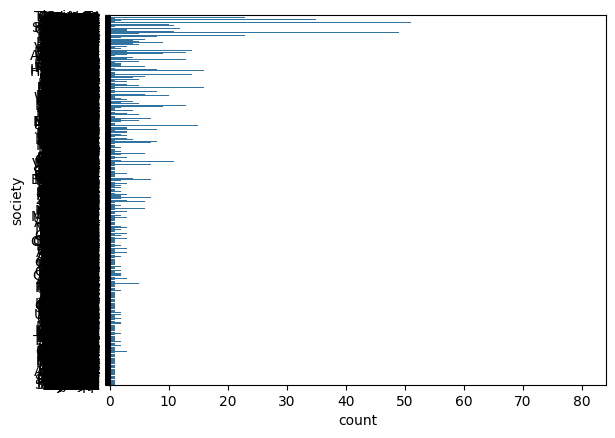

In [66]:
sns.countplot(df["society"])

<Axes: xlabel='count', ylabel='size'>

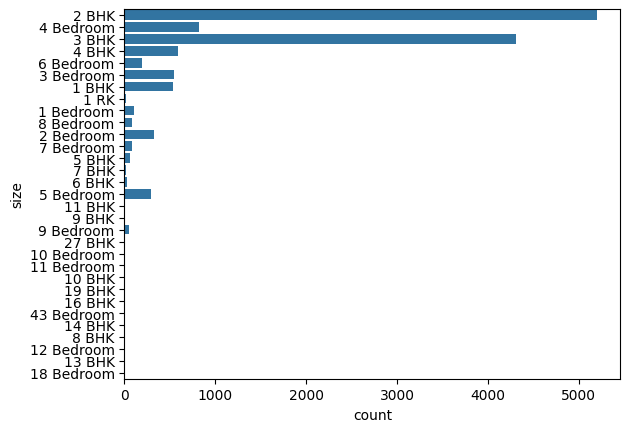

In [68]:
sns.countplot(df["size"])

<Axes: xlabel='count', ylabel='location'>

Error in callback <function _draw_all_if_interactive at 0x7c96b6c18ee0> (for post_execute):


KeyboardInterrupt: 

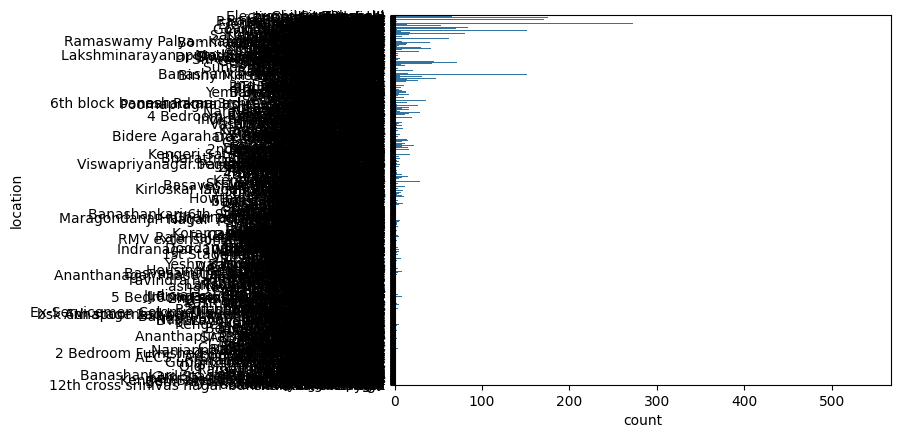

In [69]:
sns.countplot(df["location"])

<Axes: xlabel='count', ylabel='availability'>

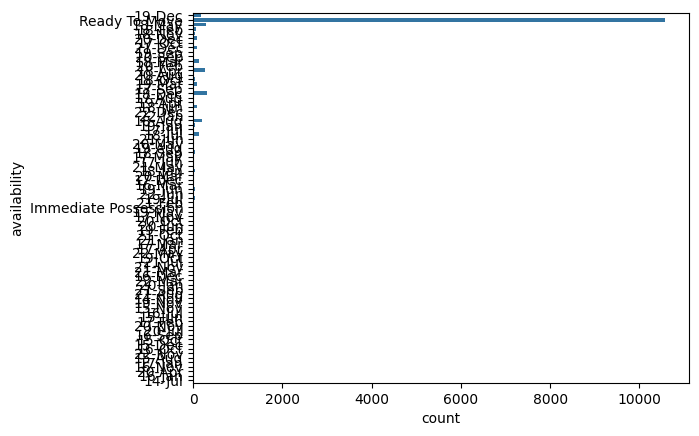

In [70]:
sns.countplot(df["availability"])

<Axes: xlabel='count', ylabel='area_type'>

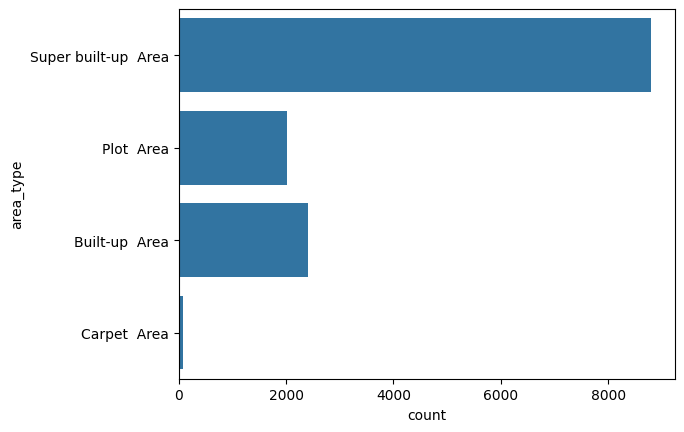

In [71]:
sns.countplot(df["area_type"])

<Axes: ylabel='area_type'>

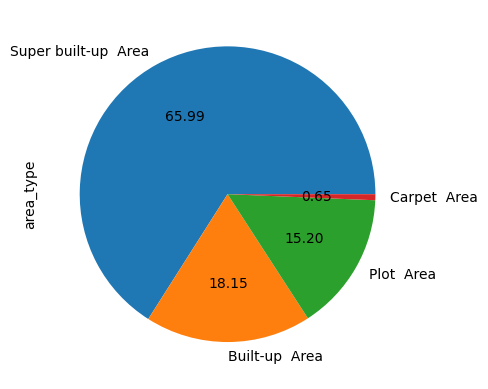

In [72]:
# pie chart
df["area_type"].value_counts().plot(kind="pie",autopct='%.2f')

<Axes: ylabel='size'>

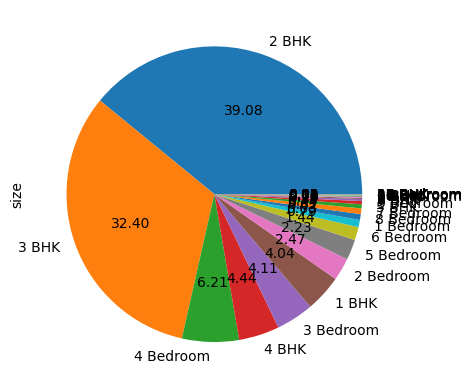

In [73]:
df["size"].value_counts().plot(kind="pie",autopct='%.2f')

In [ ]:
# for numeric columns
histogram

In [ ]:
import matplotlib.pyplot as plt

(array([1.2819e+04, 3.9800e+02, 6.0000e+01, 1.3000e+01, 1.0000e+01,
        9.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   8. ,  367.2,  726.4, 1085.6, 1444.8, 1804. , 2163.2, 2522.4,
        2881.6, 3240.8, 3600. ]),
 <BarContainer object of 10 artists>)

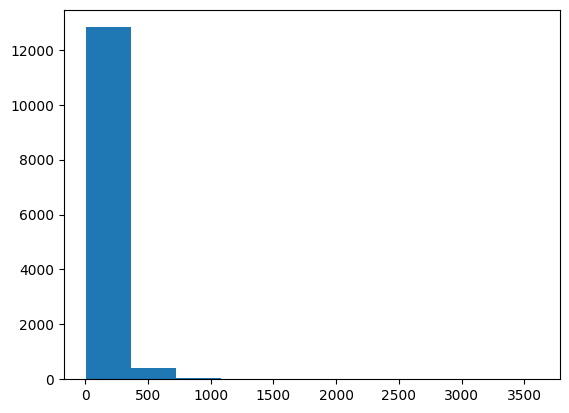

In [74]:
plt.hist(df["price"])

<Axes: ylabel='price'>

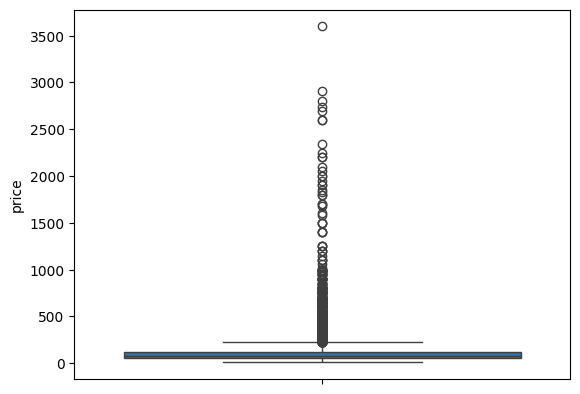

In [75]:
sns.boxplot(df["price"])

<Axes: xlabel='price', ylabel='Density'>

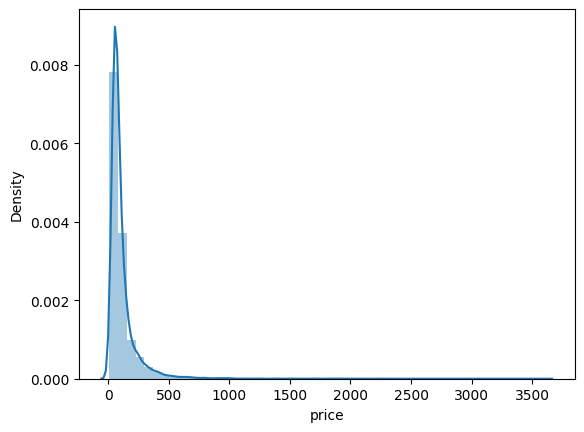

In [76]:
sns.distplot(df["price"])

In [77]:
#split data
X = df.drop('price', axis = 1)
y = df['price']

In [79]:


from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 99)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape



((10656, 8), (2664, 8), (10656,), (2664,))

In [84]:
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X =  (13320, 8)
Shape of y =  (13320,)
Shape of X_train =  (10656, 8)
Shape of y_train =  (10656,)
Shape of X_test =  (2664, 8)
Shape of y_test =  (2664,)


In [86]:
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

ValueError: could not convert string to float: 'Super built-up  Area'